# Chicago Car Crashes

**By Yamuna Umapathy & Lotus Baumgarner**

## Business Problem:

This project is about finding the primary contributory causes of car accidents in one of the most busiest city Chicago. Sources say Weather conditions, Heavy Traffic in Peak Hours, Vehicle Condition, Other driver's improper driving behaviours, Late night drivings, Texting while driving are some of the factors which causes car crashes.

Insurance Carriers implementing Good Driving behaviours through their Telematic programs by offering discounts for Consumer's Auto insurance rates, also an alternate technique to reduce Carrier's Loss ratio by reducing car crashes. 

## Dataset:

The dataset comes from Chicago Data Portal https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data 
This dataset contains 81K rows and 48 columns excluding consumer's personally identifiable information. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by 
the reporting officer based on best available information at the time during the crash. 


## 1. Data Exploration & Data Cleaning:

In [1]:
# Importing All Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
crash_df = pd.read_csv('C:\\Users\\lotus\\Documents\\Flatiron\\Projects\\Phase4Project\\Traffic_Crashes.csv')
crash_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [3]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816680 entries, 0 to 816679
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                816680 non-null  object 
 1   CRASH_DATE_EST_I               61060 non-null   object 
 2   CRASH_DATE                     816680 non-null  object 
 3   POSTED_SPEED_LIMIT             816680 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         816680 non-null  object 
 5   DEVICE_CONDITION               816680 non-null  object 
 6   WEATHER_CONDITION              816680 non-null  object 
 7   LIGHTING_CONDITION             816680 non-null  object 
 8   FIRST_CRASH_TYPE               816680 non-null  object 
 9   TRAFFICWAY_TYPE                816680 non-null  object 
 10  LANE_CNT                       199009 non-null  float64
 11  ALIGNMENT                      816680 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [4]:
crash_df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 755620
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         617671
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       24261
CRASH_TYPE                            0
INTERSECTION_RELATED_I           629384
NOT_RIGHT_OF_WAY_I               779019
HIT_AND_RUN_I                    561051
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [5]:
print(crash_df['TRAFFIC_CONTROL_DEVICE'].value_counts())
print("\n",crash_df['WEATHER_CONDITION'].value_counts())
print("\n",crash_df['LIGHTING_CONDITION'].value_counts())
print("\n",crash_df['FIRST_CRASH_TYPE'].value_counts())
print("\n",crash_df['TRAFFICWAY_TYPE'].value_counts())
print("\n",crash_df['DAMAGE'].value_counts())
print("\n",crash_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts())
print("\n",crash_df['MOST_SEVERE_INJURY'].value_counts())

NO CONTROLS                 464225
TRAFFIC SIGNAL              226390
STOP SIGN/FLASHER            81057
UNKNOWN                      32762
OTHER                         5545
LANE USE MARKING              1226
YIELD                         1206
OTHER REG. SIGN                908
OTHER WARNING SIGN             668
RAILROAD CROSSING GATE         531
PEDESTRIAN CROSSING SIGN       515
FLASHING CONTROL SIGNAL        328
DELINEATORS                    323
SCHOOL ZONE                    308
POLICE/FLAGMAN                 277
OTHER RAILROAD CROSSING        181
RR CROSSING SIGN               154
NO PASSING                      51
BICYCLE CROSSING SIGN           25
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

 CLEAR                       640655
RAIN                         71339
UNKNOWN                      45029
SNOW                         28229
CLOUDY/OVERCAST              24200
OTHER                         2595
FREEZING RAIN/DRIZZLE         1694
FOG/SMOKE/HAZE                1337
SLEET/HAIL

In [6]:
print(crash_df['INJURIES_FATAL'].value_counts())
print("\n",crash_df['INJURIES_INCAPACITATING'].value_counts())
print("\n", crash_df['INJURIES_NON_INCAPACITATING'].value_counts())
print("\n", crash_df['INJURIES_REPORTED_NOT_EVIDENT'].value_counts())
print("\n", crash_df['INJURIES_NO_INDICATION'].value_counts())

0.0    814003
1.0       835
2.0        54
3.0         8
4.0         1
Name: INJURIES_FATAL, dtype: int64

 0.0     800961
1.0      12255
2.0       1269
3.0        282
4.0         98
5.0         26
6.0          7
7.0          1
8.0          1
10.0         1
Name: INJURIES_INCAPACITATING, dtype: int64

 0.0     749009
1.0      51624
2.0       9817
3.0       2867
4.0        999
5.0        348
6.0        140
7.0         46
8.0         22
10.0         9
9.0          6
11.0         4
12.0         3
21.0         2
18.0         1
19.0         1
14.0         1
16.0         1
15.0         1
Name: INJURIES_NON_INCAPACITATING, dtype: int64

 0.0     776731
1.0      29698
2.0       6126
3.0       1582
4.0        495
5.0        172
6.0         45
7.0         22
8.0         11
9.0          9
10.0         6
15.0         2
11.0         2
Name: INJURIES_REPORTED_NOT_EVIDENT, dtype: int64

 2.0     378884
1.0     249748
3.0     102961
4.0      38459
0.0      17091
5.0      16147
6.0       6698
7.0       

In [7]:
print(crash_df['INTERSECTION_RELATED_I'].value_counts())
print("\n",crash_df['NOT_RIGHT_OF_WAY_I'].value_counts())
print("\n",crash_df['HIT_AND_RUN_I'].value_counts())

Y    178397
N      8899
Name: INTERSECTION_RELATED_I, dtype: int64

 Y    34209
N     3452
Name: NOT_RIGHT_OF_WAY_I, dtype: int64

 Y    244652
N     10977
Name: HIT_AND_RUN_I, dtype: int64


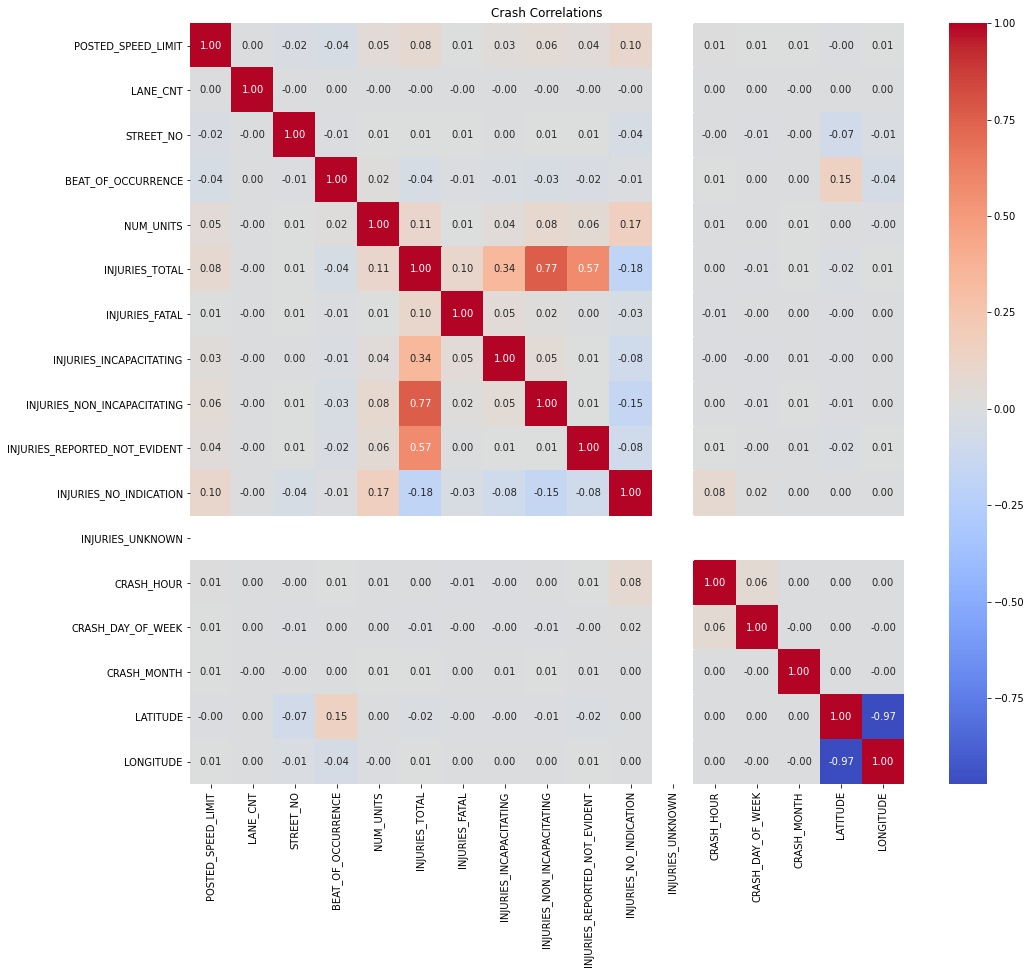

In [8]:
corr = crash_df.corr()

plt.figure(figsize=(16, 14)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Crash Correlations')

plt.show()

## Combined values inside several columns.

In [9]:
# Column TRAFFIC_CONTROL_DEVICE update
crash_df['TRAFFIC_CONTROL_DEVICE'] = crash_df['TRAFFIC_CONTROL_DEVICE'].replace({'OTHER':'OTHER_SIGN','LANE USE MARKING':'OTHER_SIGN', 'YIELD': 'OTHER_SIGN',  'OTHER REG. SIGN':'OTHER_SIGN',
                                                                             'OTHER WARNING SIGN':'OTHER_SIGN','RAILROAD CROSSING GATE':'OTHER_SIGN', 'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN',
                                                                            'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN', 'FLASHING CONTROL SIGNAL':'OTHER_SIGN',
                                                                            'DELINEATORS': 'OTHER_SIGN', 'SCHOOL ZONE':'OTHER_SIGN', 'POLICE/FLAGMAN':'OTHER_SIGN',
                                                                            'OTHER RAILROAD CROSSING':'OTHER_SIGN', 'RR CROSSING SIGN': 'OTHER_SIGN', 
                                                                            'NO PASSING':'OTHER_SIGN', 'BICYCLE CROSSING SIGN':'OTHER_SIGN'})
crash_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS          464225
TRAFFIC SIGNAL       226390
STOP SIGN/FLASHER     81057
UNKNOWN               32762
OTHER_SIGN            12246
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [10]:
# Column WEATHER_CONDITION value updates
crash_df['WEATHER_CONDITION'] = crash_df['WEATHER_CONDITION'].replace({'FREEZING RAIN/DRIZZLE':'FRZ_RAIN/SLEET', 'SLEET/HAIL':'FRZ_RAIN/SLEET',
                                                                         'FOG/SMOKE/HAZE':'OTHER', 'BLOWING SNOW':'OTHER', 
                                                                         'SEVERE CROSS WIND GATE':'OTHER', 'BLOWING SAND, SOIL, DIRT':'OTHER'})

crash_df['WEATHER_CONDITION'].value_counts()

CLEAR              640655
RAIN                71339
UNKNOWN             45029
SNOW                28229
CLOUDY/OVERCAST     24200
OTHER                4533
FRZ_RAIN/SLEET       2695
Name: WEATHER_CONDITION, dtype: int64

In [11]:
# Column FIRST_CRASH_TYPE
crash_df['FIRST_CRASH_TYPE'] = crash_df['FIRST_CRASH_TYPE'].replace({'SIDESWIPE SAME DIRECTION':'SIDESWIPE', 'SIDESWIPE OPPOSITE DIRECTION':'SIDESWIPE',
                                                            'REAR TO FRONT':'REAR_END','REAR END':'REAR_END', 'REAR TO SIDE':'REAR_END', 'REAR TO REAR':'REAR_END',
                                                            'PEDESTRIAN':'PED/BICYCLIST','PEDALCYCLIST':'PED/BICYCLIST','OTHER OBJECT':'OTHER', 
                                                            'OTHER NONCOLLISION':'OTHER', 'ANIMAL':'OTHER'}) 

crash_df['FIRST_CRASH_TYPE'].value_counts()

REAR_END                196684
PARKED MOTOR VEHICLE    189818
SIDESWIPE               136158
TURNING                 116717
ANGLE                    88826
FIXED OBJECT             38363
PED/BICYCLIST            31342
OTHER                    11252
HEAD ON                   6975
OVERTURNED                 500
TRAIN                       45
Name: FIRST_CRASH_TYPE, dtype: int64

In [12]:
# Target Column 'MOST_SEVERE_INJURY' update
crash_df['MOST_SEVERE_INJURY'] = crash_df['MOST_SEVERE_INJURY'].replace({'NO INDICATION OF INJURY':'NO_INJURY', 'NONINCAPACITATING INJURY':'NON_INCAP_INJURY',
                                                                     'REPORTED, NOT EVIDENT':'NON_INCAP_INJURY', 'FATAL':'INCAP_INJURY',
                                                                      'INCAPACITATING INJURY':'INCAP_INJURY'})

crash_df['MOST_SEVERE_INJURY'].value_counts()

NO_INJURY           702540
NON_INCAP_INJURY     97646
INCAP_INJURY         14703
Name: MOST_SEVERE_INJURY, dtype: int64

In [13]:
# Column CRASH_HOUR update from 24 values to 7
crash_df['CRASH_HOUR'] = crash_df['CRASH_HOUR'].replace({0:'LATE_NIGHT', 1:'LATE_NIGHT', 2: 'LATE_NIGHT', 3: 'LATE_NIGHT', 4: 'EARLY_MORNING',
                                                           5: 'EARLY_MORNING', 6:'EARLY_MORNING', 7:'MORNING_PEAK', 8: 'MORNING_PEAK', 9: 'MORNING_PEAK',
                                                           10: 'MID_DAY', 11:'MID_DAY', 12:'MID_DAY', 13: 'AFTERNOON', 14: 'AFTERNOON', 15: 'AFTERNOON',
                                                           16: 'EVENING_PEAK', 17: 'EVENING_PEAK', 18: 'EVENING_PEAK', 19: 'EVENING_PEAK', 20: 'NIGHT',
                                                           21: 'NIGHT', 22:'NIGHT', 23:'LATE_NIGHT'})
crash_df['CRASH_HOUR'].value_counts()

EVENING_PEAK     210375
AFTERNOON        167231
MID_DAY          126418
MORNING_PEAK     115182
NIGHT             81064
LATE_NIGHT        77869
EARLY_MORNING     38541
Name: CRASH_HOUR, dtype: int64

## 2. Feature Engineering:

This dataset contains more categorical columns, and values are more than 8-20 values, this has to be reduced before preprocessing. Or we end up
with more columns after Ordinal or One Hot encoding. Column `TRAFFIC_CONTROL_DEVICE` has 19 kind of different categorical values, reducing to 5-6 categories. Similarly `WEATHER_CONDITION` & `FIRST_CRASH_TYPE` has 12-18 values, will be reduced to 5-6.

Choosing our TARGET column as `MOST_SEVERE_INJURY` which has 5 categorical values, this will be changed to 3 options: NO_INJURY, NON_INCAP_INJURY 
and INCAP_INJURY. Both `FATAL` and `INCAPACITATING INJURY` will be joined. `REPORTED, NOT EVIDENT` will be joined with NON_INCAP_INJURY, since we 
don't have evidence if those cases were treated later or comes under 'NO_INJURY' category. Also columns INJURIES_TOTAL, INJURIES_FATAL, 
INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION & INJURIES_UNKNOWN are same as our
TARGET columns, and have to be excluded from Dataset before splitting X_train, X_test.

Column `CRASH_HOUR` has 24 values from 0-24 as hours, this will be divided to 5 categories: MORNING_PEAK, MIDDAY, EVENING_PEAK, NIGHT and LATE_NIGHT. 
Hour of the day for crash is important feature to check at which category more crashes happen.

In [14]:
# Making a copy before making major changes.
crash1_df = crash_df.copy()

In [15]:
# SPLIT THE DATA INTO TRAINING AND TESTS SETS

X = crash1_df.drop('MOST_SEVERE_INJURY', axis=1)
y = crash1_df['MOST_SEVERE_INJURY']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X_train.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
244133,464384c10d232ac126f1fde6f9ac399a759ea144e91433...,NaN,07/22/2018 04:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,1.0,0.0,EARLY_MORNING,1,7,41.949413,-87.669068,POINT (-87.669068331437 41.949413152532)
444077,871897e258b1cb8aaf3e5af8984ffb5eb7945fb368ecef...,NaN,09/07/2017 07:03:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,EVENING_PEAK,5,9,41.918757,-87.755917,POINT (-87.755917071007 41.918757423569)
797550,f9cd74f6d3a14afc84740fa7c44d979db2c9baa457a061...,NaN,07/29/2021 11:39:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,LATE_NIGHT,5,7,41.730861,-87.588149,POINT (-87.588149375945 41.730861315603)
739404,e6f65a3ebaaf31d6ff5a30cc0a46fffd68489e85e9ee50...,NaN,10/11/2023 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,REAR_END,FOUR WAY,...,0.0,0.0,2.0,0.0,EVENING_PEAK,4,10,41.797157,-87.753753,POINT (-87.75375314781 41.797157257667)
226006,406b69489c230b0a88cd63198f74f3cf5abdcec700a87d...,NaN,11/15/2018 06:09:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,3.0,0.0,EVENING_PEAK,5,11,41.865128,-87.666196,POINT (-87.666195763926 41.865127566968)


In [17]:
y_train.head()

244133       NO_INJURY
444077       NO_INJURY
797550       NO_INJURY
739404       NO_INJURY
226006    INCAP_INJURY
Name: MOST_SEVERE_INJURY, dtype: object

In [18]:
# Dropped columns from X_train and X_test. 
# Coulmns are either missing to many values, deemed not correlated to our target varible, or column's information is found in another column.

# List of column names to drop
columns_to_drop = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 
                   'DOORING_I', 'WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'LOCATION', 'INJURIES_TOTAL', 
                   'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT', 
                   'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'STREET_NO', 
                   'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I']

# Dropped Columns from X_train and X_test
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Checked results
X_train.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,LATITUDE,LONGITUDE
244133,07/22/2018 04:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",07/22/2018 04:16:00 AM,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,DRIVING ON WRONG SIDE/WRONG WAY,3,EARLY_MORNING,41.949413,-87.669068
444077,09/07/2017 07:03:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",09/07/2017 08:07:00 PM,FAILING TO YIELD RIGHT-OF-WAY,DISREGARDING STOP SIGN,2,EVENING_PEAK,41.918757,-87.755917
797550,07/29/2021 11:39:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",07/29/2021 11:39:00 PM,DRIVING ON WRONG SIDE/WRONG WAY,UNABLE TO DETERMINE,2,LATE_NIGHT,41.730861,-87.588149
739404,10/11/2023 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,REAR_END,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",10/13/2023 01:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2,EVENING_PEAK,41.797157,-87.753753
226006,11/15/2018 06:09:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",11/15/2018 06:20:00 PM,WEATHER,NOT APPLICABLE,2,EVENING_PEAK,41.865128,-87.666196


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653344 entries, 244133 to 121958
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_DATE               653344 non-null  object 
 1   POSTED_SPEED_LIMIT       653344 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE   653344 non-null  object 
 3   DEVICE_CONDITION         653344 non-null  object 
 4   WEATHER_CONDITION        653344 non-null  object 
 5   LIGHTING_CONDITION       653344 non-null  object 
 6   FIRST_CRASH_TYPE         653344 non-null  object 
 7   TRAFFICWAY_TYPE          653344 non-null  object 
 8   ALIGNMENT                653344 non-null  object 
 9   ROADWAY_SURFACE_COND     653344 non-null  object 
 10  ROAD_DEFECT              653344 non-null  object 
 11  CRASH_TYPE               653344 non-null  object 
 12  DAMAGE                   653344 non-null  object 
 13  DATE_POLICE_NOTIFIED     653344 non-null  object 
 14 